### Import TensorFlow and other libraries

In [1]:
import os, datetime

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model

from PIL import Image
import matplotlib.pyplot as plt

import pydotplus
import pydot

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [3]:
base_dir = "C:/Users/Hrishikesh Jakanur/Desktop/Mini Project/archive/real_vs_fake/real-vs-fake/"
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
valid_dir = os.path.join(base_dir, 'valid')

### Image preparation for CNN Image Classifier

In [4]:
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen = ImageDataGenerator( rescale = 1.0/255. )
valid_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [5]:
train_generator = train_datagen.flow_from_directory(train_dir, batch_size=100, class_mode='binary', target_size=(150, 150))

validation_generator = valid_datagen.flow_from_directory(valid_dir, batch_size=100, class_mode='binary', target_size=(150, 150))

test_generator = test_datagen.flow_from_directory(test_dir, batch_size=100, class_mode='binary', target_size=(150, 150))

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


### Visualize the data

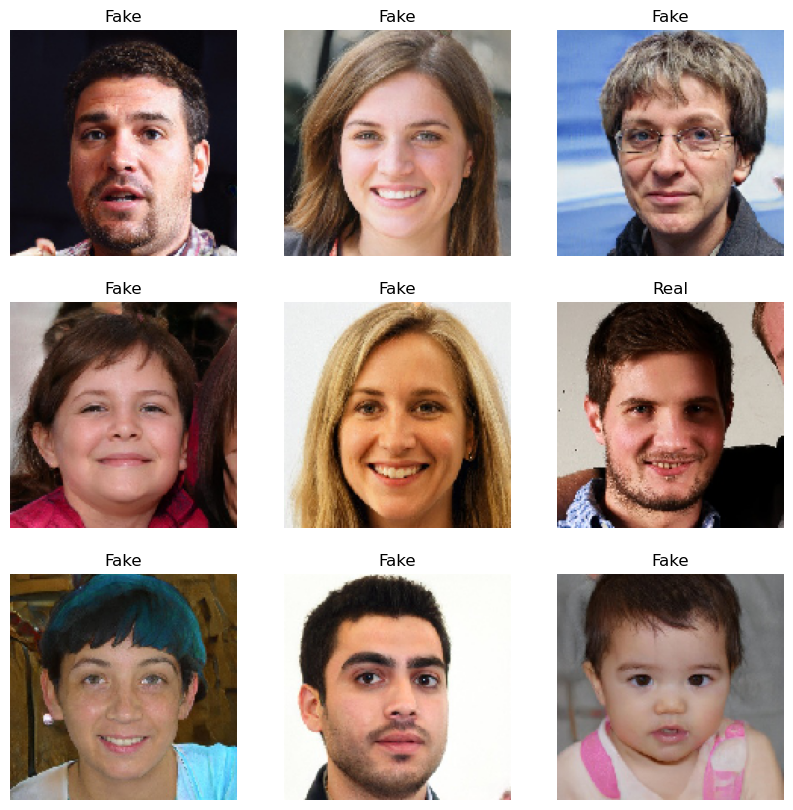

In [6]:
plt.figure(figsize=(10, 10))
for i in range(9):
    img, label = next(train_generator)  # Use next() instead of .next()
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(img[0])
    if label[0] == 0.0:
        plt.title("Fake")
    else:
        plt.title("Real")
    plt.axis("off")


## Model architecture

In [7]:
model = tf.keras.models.Sequential(
    [
     tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
     tf.keras.layers.MaxPooling2D(2,2),

     tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),

     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),

     tf.keras.layers.Flatten(),

     tf.keras.layers.Dense(1064, activation='relu'),
     tf.keras.layers.Dense(2, activation='softmax')
    ]
)

E:\Conda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# x = tf.keras.layers.Conv2D(16, activation='relu', kernel_size=3, input_shape=(75, 75, 1))(inputs)
# x = tf.keras.layers.AveragePooling2D((2, 2))(x)

# x = tf.keras.layers.Conv2D(32,kernel_size=3,activation='relu')(x)
# x = tf.keras.layers.AveragePooling2D((2, 2))(x)

# x = tf.keras.layers.Conv2D(64,kernel_size=3,activation='relu')(x)
# x = tf.keras.layers.AveragePooling2D((2, 2))(x)

# x = tf.keras.layers.flatten()(x)

## Visualizing network architectures

In [9]:
tf.keras.utils.pydot = pydot

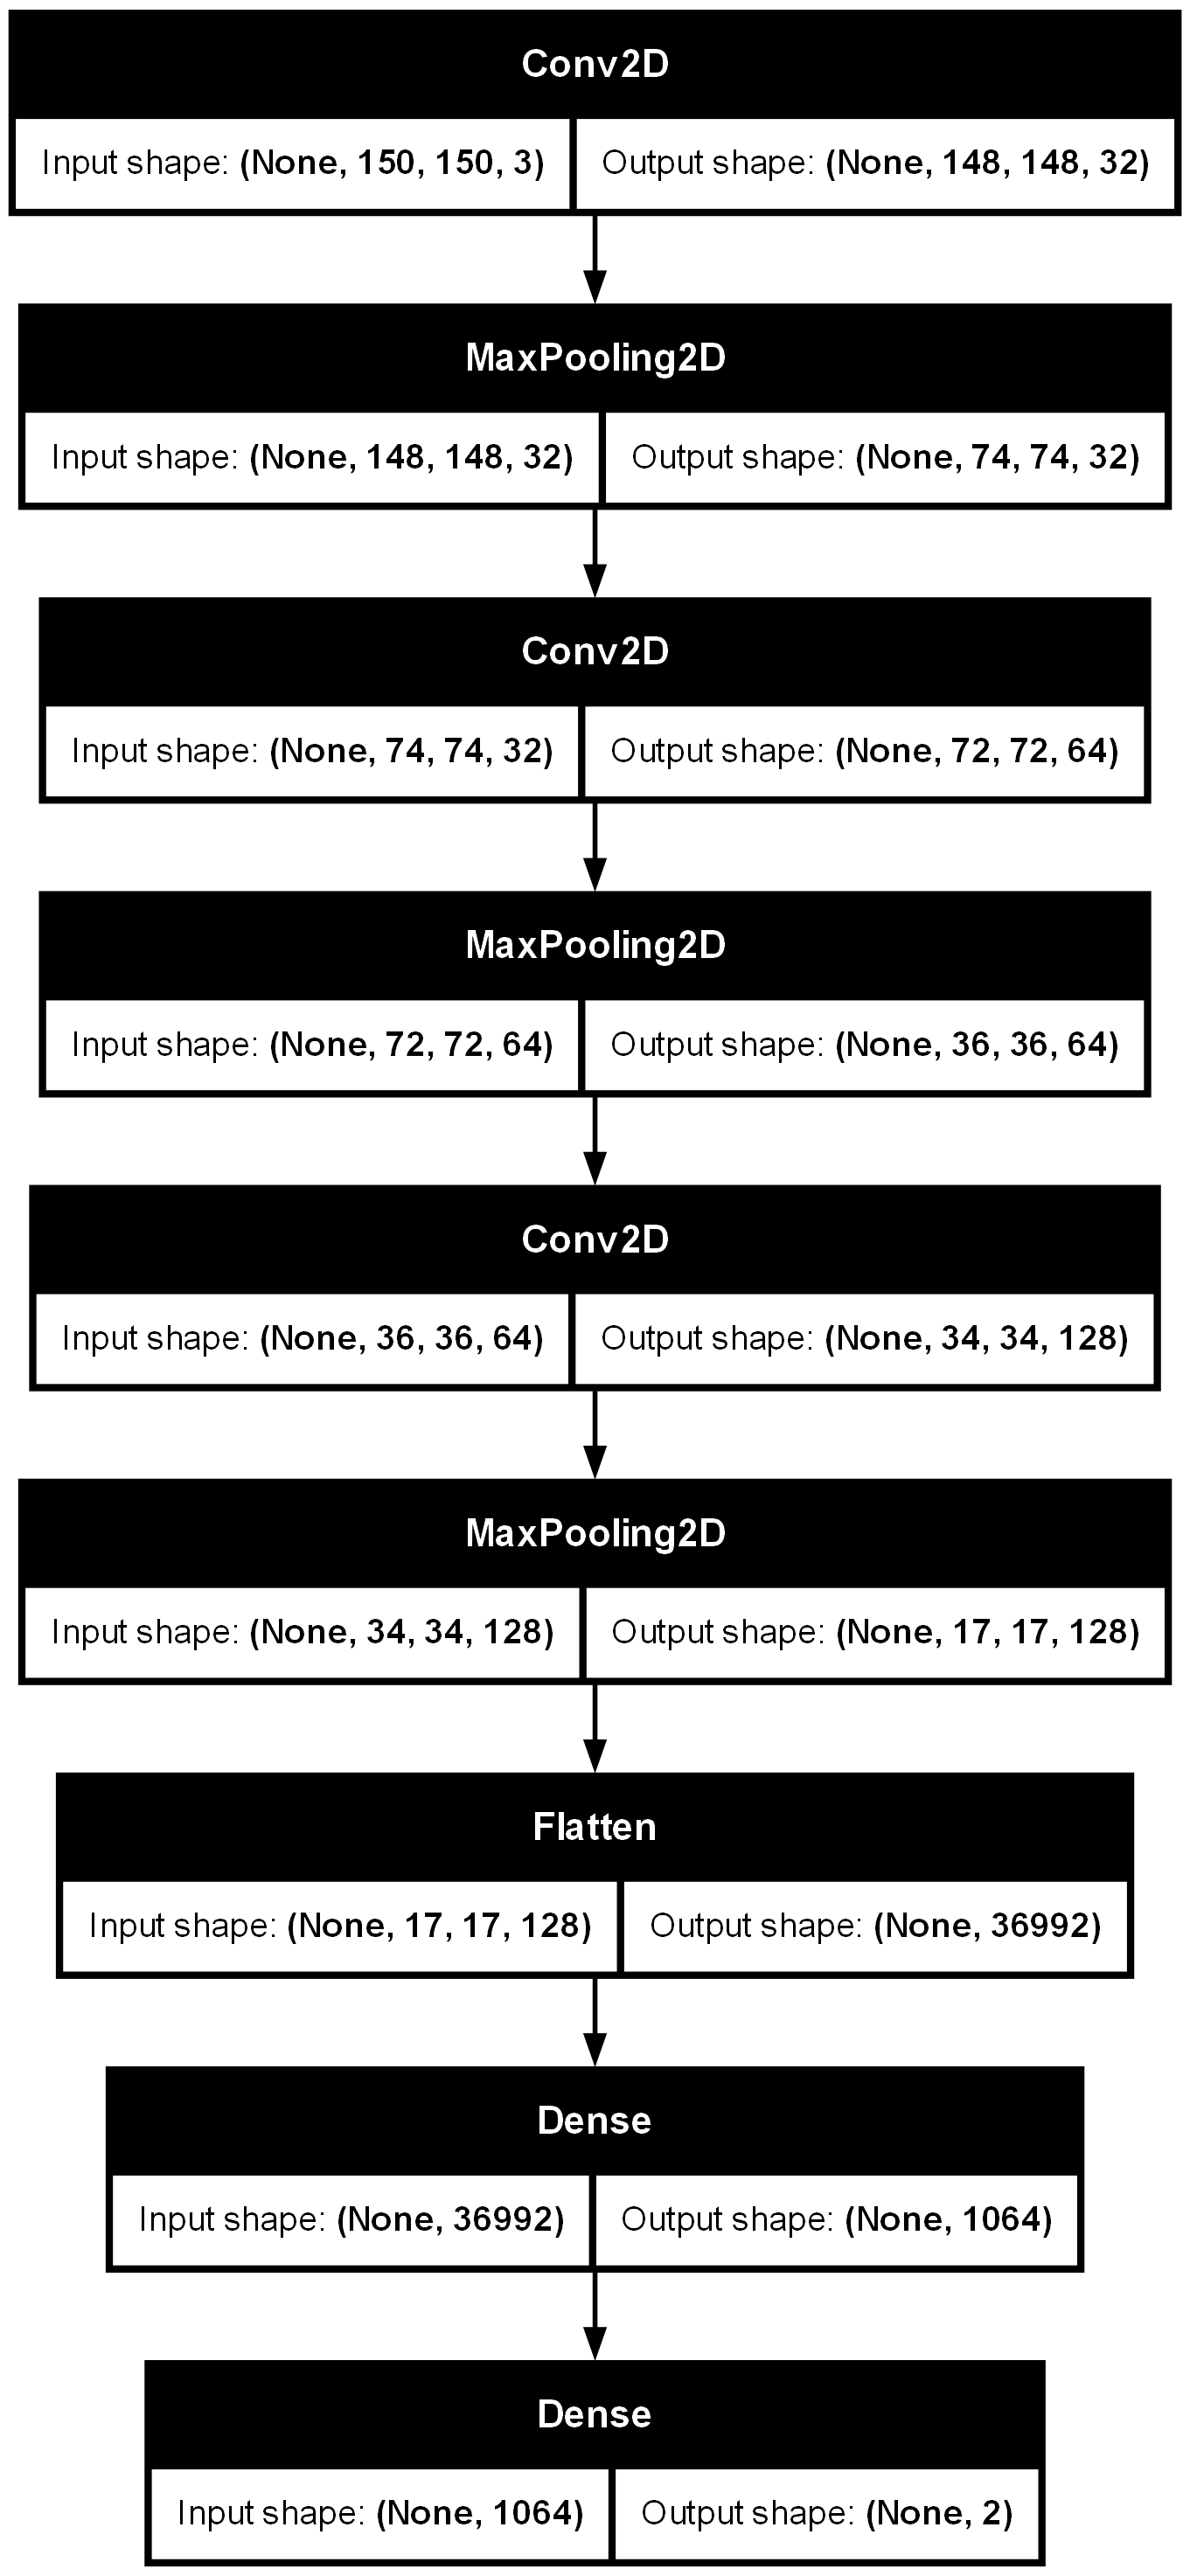

In [10]:
plot_model(model, to_file='model.png', show_shapes=True)

#### Model summary

View all the layers of the network using the model's summary method:

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1064)                │      39,360,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           2,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 39,455,930 (150.51 MB)

 Trainable params: 39,455,930 (150.51 MB)

 Non-trainable params: 0 (0.00 B)

#### Compile and train the model

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [13]:
%%time
history = model.fit(train_generator, validation_data = validation_generator, epochs = 5, validation_steps = 20, verbose=1)

Epoch 1/5


E:\Conda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3032s 3s/step - accuracy: 0.6714 - loss: 0.6791 - val_accuracy: 0.8350 - val_loss: 0.3649
Epoch 2/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3412s 3s/step - accuracy: 0.8571 - loss: 0.3281 - val_accuracy: 0.9015 - val_loss: 0.2317
Epoch 3/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2727s 3s/step - accuracy: 0.9195 - loss: 0.1972 - val_accuracy: 0.9235 - val_loss: 0.1931
Epoch 4/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 20973s 21s/step - accuracy: 0.9519 - loss: 0.1229 - val_accuracy: 0.9490 - val_loss: 0.1275
Epoch 5/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2912s 3s/step - accuracy: 0.9721 - loss: 0.0722 - val_accuracy: 0.9500 - val_loss: 0.1310
CPU times: total: 9h 33min 34s
Wall time: 9h 10min 57s


#### Visualize training results

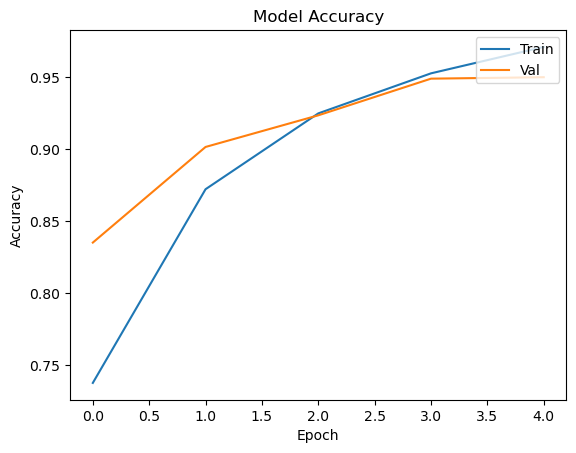

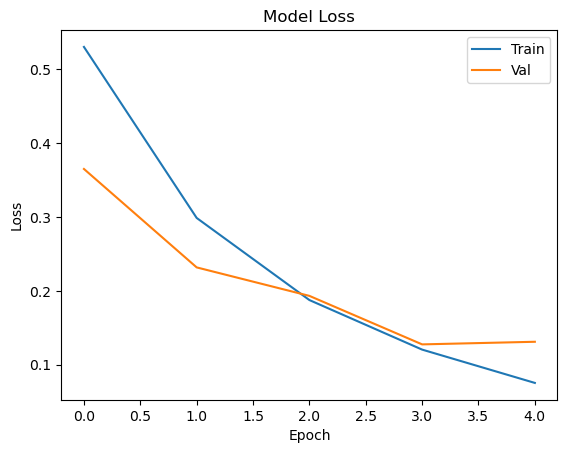

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

### Evaluate the model on the test data via evaluate():

In [15]:
test_loss, test_acc = model.evaluate(test_generator)

200/200 ━━━━━━━━━━━━━━━━━━━━ 335s 2s/step - accuracy: 0.9474 - loss: 0.1434


In [33]:
class_names = ['fake', 'real']
class_names

['fake', 'real']

#### Predict on new data

In [26]:
import numpy as np
from keras.preprocessing import image

test_image = image.load_img("C:/Users/Hrishikesh Jakanur/Desktop/Photos/IMG_2548[1].JPG", target_size=(150, 150, 3))

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
test_generator.class_indices

print(result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
[[0. 1.]]
